<a href="https://colab.research.google.com/github/Mariannly/EPIC_5/blob/main/Dorothy_Coding_Challenge/Stage_1/stage1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stage 1 Challenge

Please provide your stage-1 group solutions within a single Jupyter notebook (*.ipynb).

When you finish, please upload your solution notebook here:

https://forms.gle/bmvUYeACiE9igb4T7


**DEADLINE:** 11 May 2025 (by 23h59)



## Exploratory Data Analysis (EDA): Summer Olympics Dataset

### What is Exploratory Data Analysis (EDA)?
EDA is the essential first step in analyzing a dataset. It involves examining data to identify patterns, detect outliers, evaluate different machine learning models, and verify assumptions through the use of statistics and scientific visualization.

### A Brief Outline Of The Dataset

- This dataset provides a comprehensive record of the modern Olympic Games, covering events from the 1896 Athens Olympics up to the 2016 Rio Olympics.

- The dataset includes 271,116 entries and 15 attributes in total.

- Each entry represents an individual athlete participating in a specific Olympic event (i.e., athlete-event combinations).
The attributes capture various details such as:

    - ID – A unique identifier for each athlete
    - Name – Athlete’s full name
    - Sex – Gender (M or F)
    - Age – Age in years
    - Height – Measured in centimeters
    - Weight – Measured in kilograms
    - Team – Name of the team or country represented
    - Medal – Type of medal won (Gold, Silver, Bronze)

## Downloading The Data And Importing Libraries

##  Task 1: Load Data & Import Libraries

**Goal:** Set up your environment and download the dataset for analysis.

### Instructions:

1. Download the dataset using `opendatasets`.  
   - Dataset URL: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results  
   - You may need to provide your Kaggle API credentials.


2. Set file paths for:
   - `athlete_data_filename` → `athlete_events.csv`
   - `regions_data_filename` → `noc_regions.csv`


3. Install and import the following libraries:
   - `pandas`, `numpy`
   - `matplotlib.pyplot`, `seaborn`
   - `plotly.express`
   - `ListedColormap` from `matplotlib.colors`


**Expected Output:**

- Dataset downloaded

- All libraries successfully imported

- File paths assigned


In [ ]:
!pip install opendatasets --upgrade
import opendatasets as od

In [ ]:
# 1. Downloading dataset:

od.download("https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results")

Skipping, found downloaded files in "./120-years-of-olympic-history-athletes-and-results" (use force=True to force download)


In [ ]:
# 2. Setting paths:

athelete_data_filename = "./120-years-of-olympic-history-athletes-and-results/athlete_events.csv"
regions_data_filename = "./120-years-of-olympic-history-athletes-and-results/noc_regions.csv"

In [ ]:
# 3. Importing libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from matplotlib.colors import ListedColormap

##  Task 2: Set Plot Style and Color Palette

**Goal:** Customize the appearance of your plots for consistent and clean visuals.

### Instructions:
1. Set the global style for all plots using `plt.style.use()`.  
   - Use `'ggplot'` for a simple, clean base style.

2. Define a custom color palette:
   - Use a list of hex color codes.
   - Example: `["#0a2e36", "#27FB6B", "#14cc60", "#036d19", "#09a129"]`

3. Apply the color palette using Seaborn:
   - Use `sns.set_palette()`.

**Expected Output:**

- Style applied.

- Custom color palette preview shown.


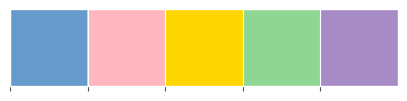

In [ ]:
# 1. Seting the global style:

plt.style.use('ggplot')

# 2. Defining the color palette (Olympics inspired):

color_palette = ["#6699CC", "#FFB6C1", "#FFD700", "#8FD694", "#A78BC5"]

# 3. Applying the color palette:

sns.set_palette(color_palette)

# vizualise color palette
sns.palplot(sns.color_palette(color_palette))

## Task 3: Data Preparation

**Goal:** Prepare data for analysis.

###  Steps:

1. Load the file using pandas.

2. Look for some of the information about the data and the columns.

3. Fix any of the missing or incorrect values.

4. Which, and how much data types are in the dataset.

5. List the minimum age on the competence.

The focus of this EDA project will solely be on the "Summer Olympics", filter of all the "Winter Olympics Games" from the dataset.

In [ ]:
# 1. Loading files

athelete_data = pd.read_csv(athelete_data_filename)
regions_data = pd.read_csv(regions_data_filename)

In [32]:
# 2. Basic info

athelete_data.columns
regions_data.columns
athelete_data.head()
regions_data.head()

athelete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [26]:
regions_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB


In [27]:
athelete_data.describe()

,ID,Age,Height,Weight,Year
count,271116.000000,261642.000000,210945.000000,208241.000000,271116.000000
mean,68248.954396,25.556898,175.338970,70.702393,1978.378480
std,39022.286345,6.393561,10.518462,14.348020,29.877632
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34643.000000,21.000000,168.000000,60.000000,1960.000000
50%,68205.000000,24.000000,175.000000,70.000000,1988.000000
75%,102097.250000,28.000000,183.000000,79.000000,2002.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [28]:
regions_data.describe()

,NOC,region,notes
count,230,227,21
unique,230,206,21
top,AFG,Germany,Netherlands Antilles
freq,1,4,1


In [29]:
# 3. Fixing values

athelete_data.isnull().sum()

,0
ID,0
Name,0
Sex,0
Age,9474
Height,60171
Weight,62875
Team,0
NOC,0
Games,0
Year,0


In [30]:
regions_data.isnull().sum()

,0
NOC,0
region,3
notes,209


In [ ]:
# 4. Data types

In [ ]:
# 5. Minimum age

## Task 4: Merging The Two Datasets Into One

**Goal:** Merge datasets.

Before we can begin analyzing the data, we need to combine the two datasets:  
- `athlete_events.csv` (athlete information)
- `noc_regions.csv` (region/country information)

Use the `pandas.merge()` function to do this.

###  Steps:

1. **Call `pd.merge()`**  
   This function merges two DataFrames based on one or more common columns (known as keys).

2. **Set merge type and key**  
   We'll perform a **left join** on the `NOC` column:
   - This keeps **all records** from `athlete_events` (left DataFrame).
   - It adds matching `region` data from `noc_regions` (right DataFrame).
   - Rows with no match in the right DataFrame will have `NaN` values in those columns.



In [ ]:
data = pd.merge(athelete_data, regions_data)

## Task 5: Finding and Replacing The Null Values In Our Dataset

**Goal:** Data cleaning and exploratory analysis.

### Cleaning Tasks:

- Visualize the distribution of missing values using pie charts or bar plots.

- Calculate and list the percentage of null values for each column. Replace missing values with the mean of the respective column when appropriate.

- Remove duplicate entries from the dataset to ensure accuracy.

### Exploratory Questions:

1. Which country has sent the most athletes to the Summer Olympics?

2. How has the number of athletes, countries, and events changed over time?

3. Which nations have won the most Olympic medals?

4. How has participation by male and female athletes evolved over time?

5. What is the correlation between the height and weight of Olympic participants?

6. In which sports has India won Olympic medals?

7. Which sports have contributed the most medals overall?

##  Task 6: Exploratory Analysis and Visualisations

**Goal:** Data analysis and visualization.

### 1. Create a word-cloud that graphically shows the nations that have sent the maximum number of athletes over the years.

### 2. Show the relation between various features and labels in the Olympics dataset and infere/discuss any trends and correlations.

### 3. Make a plot of the overall spread of the age of athletes in the Summer Olympics and discuss your findings.

### 4. Make a plot of the number of participants in the Summer Olympics over the years and discuss the overall trends.

### 5. Describe the variation in the number of female participants over the years in the Summer Olympics.

### 6. Show graphically the variation of the number of female participants in comparison to male participants over the years.

### 7. Create a scatter plot of the relationship between Height Vs Weight Vs Age of participants across sports. Any conclusions?


### 8. Find and list the top 10 nations that have won the most Gold, Silver, and Bronze Medals, respectively, in the history of the Summer Olympics.

### 9. Create a word-cloud showing sports in which India has won medals over the years.

### 10. Look up and list the top 3 female athletes by the number of awarded medals across all sports.

# Optional: Additional tasks

- Make a Choropleth Map mark the countries and explain why there is a sudden exponential drop in the number of participants at three instances in the historical timeline of the Olympics.

- Does Wealth (GDP) have any effect on a country's performance in the Olympics?

You can use this dataset for this:  [GDP dataset](https://github.com/bhushanrane29/Summer-Olympics-EDA/blob/master/gdp_data.csv) that can merged with the above dataset to perform this analysis.

- What is the relation between a countries climate and their olympic medal tally?

- Does home advantage give countries an edge in their medals tally? (Linearcurve)

- Does an athele's height have any role to play in winning an olympic medal? (Heatmap)

- You can add the Paralympics dataset to this [link](https://www.kaggle.com/shivagovindasamy/2020-tokyo-paralympics) data too

- Replace the pie charts with sunburst charts at places where it is possible